## **讀取檔案**

In [ ]:
import os
print(os.getcwd())
 
os.chdir('C:/Users/user/Documents/python')
 
print(os.getcwd())

In [4]:
import pandas as pd
import numpy as np
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')

X_test = pd.read_csv('X_test.csv')
print(X_train.shape)
print(X_train.columns)
print(y_train.columns)

(85751, 8)
Index(['PERIOD', 'GAME_CLOCK', 'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME',
       'SHOT_DIST', 'PTS_TYPE', 'CLOSE_DEF_DIST'],
      dtype='object')
Index(['FGM'], dtype='object')


### **標準化**

In [5]:
from sklearn.preprocessing import StandardScaler
# Z-normalize data
sc = StandardScaler()
X_std = sc.fit_transform(X_train)

## **Ridge regression**

In [6]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')

sc = StandardScaler()
X_std = sc.fit_transform(X_train)

poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X_std)

X_train, X_valid, y_train, y_valid = train_test_split(
        X_poly, y_train, test_size=0.2, random_state=0)

for a in [0, 1, 10, 100, 1000]:
    lr_rg = Ridge(alpha=a)
    lr_rg.fit(X_train, y_train)

    y_train_pred = lr_rg.predict(X_train)
    y_valid_pred = lr_rg.predict(X_valid)

    print('\n[Alpha = %d]' % a )

    y_train_pred = np.where(y_train_pred>0.5,1,0)
    y_valid_pred = np.where(y_valid_pred>0.5,1,0)

    print('Train&Valid Misclassified samples: %d , %d' % ((y_train != y_train_pred).sum(), 
                                  (y_valid != y_valid_pred).sum()))
    print('Train&Valid Accuracy: %.2f , %.2f' % (accuracy_score(y_train, y_train_pred),
                              accuracy_score(y_valid, y_valid_pred)))    


[Alpha = 0]
Train&Valid Misclassified samples: 26163 , 6693
Train&Valid Accuracy: 0.62 , 0.61

[Alpha = 1]
Train&Valid Misclassified samples: 26161 , 6676
Train&Valid Accuracy: 0.62 , 0.61

[Alpha = 10]
Train&Valid Misclassified samples: 26160 , 6676
Train&Valid Accuracy: 0.62 , 0.61

[Alpha = 100]
Train&Valid Misclassified samples: 26147 , 6672
Train&Valid Accuracy: 0.62 , 0.61

[Alpha = 1000]
Train&Valid Misclassified samples: 26157 , 6683
Train&Valid Accuracy: 0.62 , 0.61


Alpha = 100 時表現最好

### **挑選 Threshold**

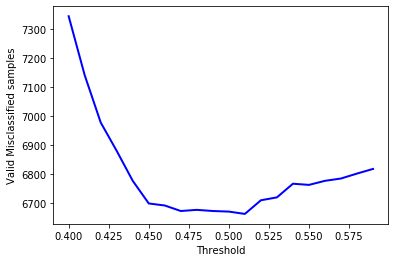

array([0.51])

In [5]:
from matplotlib import pyplot

X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')

sc = StandardScaler()
X_std = sc.fit_transform(X_train)

poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X_std)

X_train, X_valid, y_train, y_valid = train_test_split(
        X_poly, y_train, test_size=0.2, random_state=0)

a = np.arange(0.4, 0.6, 0.01)
results_valid=[]
lr_rg = Ridge(alpha=100)
lr_rg.fit(X_train, y_train)

for n in a:

    y_train_pred = lr_rg.predict(X_train)
    y_valid_pred = lr_rg.predict(X_valid)


    y_train_pred = np.where(y_train_pred>n,1,0)
    y_valid_pred = np.where(y_valid_pred>n,1,0)
    # print('\n[Alpha = %.2f]' % n )
    # print('Train&Valid Misclassified samples: %d , %d' % ((y_train != y_train_pred).sum(), 
    #                               (y_valid != y_valid_pred).sum()))
    # print('Train&Valid Accuracy: %.2f , %.2f' % (accuracy_score(y_train, y_train_pred),
    #                           accuracy_score(y_valid, y_valid_pred)))
    acc_valid = (y_valid != y_valid_pred).sum()
    results_valid.append(acc_valid)
    
pyplot.plot(a, results_valid, label = 'Valid', color = 'blue', linewidth = 2)
pyplot.xlabel('Threshold')
pyplot.ylabel('Valid Misclassified samples')
pyplot.show()
c = pd.DataFrame(results_valid)
a[c.idxmin()]

Threshold = 0.51 時表現最好

### **Coefficients v.s. Alpha**

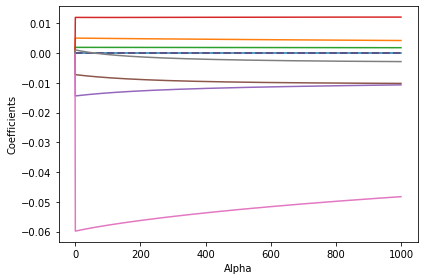

In [7]:
import matplotlib.pyplot as plt

max_alpha = 1000
coef_ = np.zeros((max_alpha, 165))

X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')

sc = StandardScaler()
X_std = sc.fit_transform(X_train)

poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X_std)

X_train, X_valid, y_train, y_valid = train_test_split(
        X_poly, y_train, test_size=0.2, random_state=0)

for a in range(1, max_alpha):
    lr_rg = Ridge(alpha=a)
    lr_rg.fit(X_train, y_train)

    y_train_pred = lr_rg.predict(X_train)
    y_valid_pred = lr_rg.predict(X_valid)
    coef_[a,:] = lr_rg.coef_.reshape(1,-1)
    
plt.hlines(y=0, xmin=0, xmax=max_alpha, color='red', linewidth = 2, linestyle = '--')

for i in range(8):
    plt.plot(range(max_alpha),coef_[:,i])
    
plt.ylabel('Coefficients')
plt.xlabel('Alpha')
plt.tight_layout()
plt.show()

## **LASSO**

In [12]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')

sc = StandardScaler()
X_std = sc.fit_transform(X_train)

poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X_std)

X_train, X_valid, y_train, y_valid = train_test_split(
        X_poly, y_train, test_size=0.2, random_state=0)

for a in [0, 0.001, 0.01, 0.1, 1, 10]:
    lr_rg = Lasso(alpha=a, max_iter=1000)
    lr_rg.fit(X_train, y_train)

    y_train_pred = lr_rg.predict(X_train)
    y_valid_pred = lr_rg.predict(X_valid)

    y_train_pred = np.where(y_train_pred>0.5,1,0).reshape(-1,1) 
    y_valid_pred = np.where(y_valid_pred>0.5,1,0).reshape(-1,1)   

    print('\n[Alpha = %.4f]' % a )

    print('Train&Valid Misclassified samples: %d , %d' % ((y_train != y_train_pred).sum(), 
                                  (y_valid != y_valid_pred).sum()))
    print('Train&Valid Accuracy: %.2f , %.2f' % (accuracy_score(y_train, y_train_pred),
                              accuracy_score(y_valid, y_valid_pred)))    

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:18: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7896.1108131296005, tolerance: 1.6993458760932953
  positive)



[Alpha = 0.0000]
Train&Valid Misclassified samples: 26139 , 6673
Train&Valid Accuracy: 0.62 , 0.61

[Alpha = 0.0010]
Train&Valid Misclassified samples: 26131 , 6676
Train&Valid Accuracy: 0.62 , 0.61

[Alpha = 0.0100]
Train&Valid Misclassified samples: 26281 , 6717
Train&Valid Accuracy: 0.62 , 0.61

[Alpha = 0.1000]
Train&Valid Misclassified samples: 29726 , 7606
Train&Valid Accuracy: 0.57 , 0.56

[Alpha = 1.0000]
Train&Valid Misclassified samples: 31023 , 7887
Train&Valid Accuracy: 0.55 , 0.54

[Alpha = 10.0000]
Train&Valid Misclassified samples: 31023 , 7887
Train&Valid Accuracy: 0.55 , 0.54


Alpha = 0 時表現最好



### **挑選 Threshold**

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:16: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  app.launch_new_instance()
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7896.1108131296005, tolerance: 1.6993458760932953
  positive)


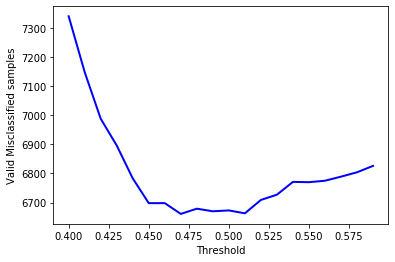

array([0.47])

In [13]:
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')

sc = StandardScaler()
X_std = sc.fit_transform(X_train)

poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X_std)

X_train, X_valid, y_train, y_valid = train_test_split(
        X_poly, y_train, test_size=0.2, random_state=0)

a = np.arange(0.4, 0.6, 0.01)
results_valid=[]
lr_rg = Lasso(alpha=0)
lr_rg.fit(X_train, y_train)

for n in a:
    y_train_pred = lr_rg.predict(X_train)
    y_valid_pred = lr_rg.predict(X_valid)

    y_train_pred = np.where(y_train_pred>n,1,0).reshape(-1,1) 
    y_valid_pred = np.where(y_valid_pred>n,1,0).reshape(-1,1) 


    # print('\n[Alpha = %.2f]' % n )
    # print('Train&Valid Misclassified samples: %d , %d' % ((y_train != y_train_pred).sum(), 
    #                               (y_valid != y_valid_pred).sum()))
    # print('Train&Valid Accuracy: %.2f , %.2f' % (accuracy_score(y_train, y_train_pred),
    #                           accuracy_score(y_valid, y_valid_pred)))
    acc_valid = (y_valid != y_valid_pred).sum()
    results_valid.append(acc_valid)
    
pyplot.plot(a, results_valid, label = 'Valid', color = 'blue', linewidth = 2)
pyplot.xlabel('Threshold')
pyplot.ylabel('Valid Misclassified samples')
pyplot.show()
c = pd.DataFrame(results_valid)
a[c.idxmin()]

Threshold = 0.47 時表現最好

### **Coefficients v.s. Alpha**

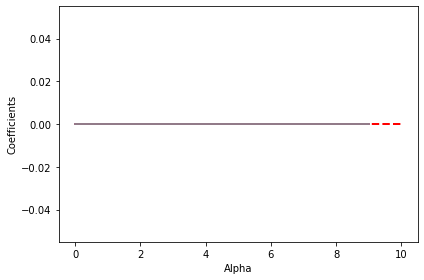

In [14]:
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')

sc = StandardScaler()
X_std = sc.fit_transform(X_train)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_std, y_train, test_size=0.2, random_state=100)

max_alpha = 10
coef_ = np.zeros((max_alpha,8))

for a in range(10):
    lr_rg = Lasso(alpha=a+0.1)
    lr_rg.fit(X_train, y_train)

    y_train_pred = lr_rg.predict(X_train)
    y_valid_pred = lr_rg.predict(X_valid)
    coef_[a,:] = lr_rg.coef_.reshape(1,-1)
    
plt.hlines(y=0, xmin=0, xmax=max_alpha, color='red', linewidth = 2, linestyle = '--')

for i in range(8):
    plt.plot(range(max_alpha),coef_[:,i])
    
plt.ylabel('Coefficients')
plt.xlabel('Alpha')
plt.tight_layout()
plt.show()

### **選前三個變數**

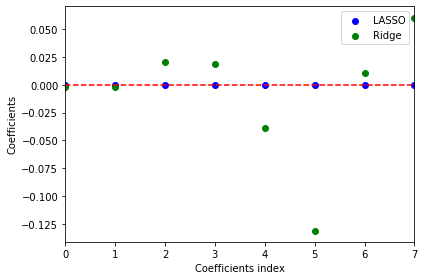

Selected attributes: ['TOUCH_TIME' 'SHOT_DIST' 'CLOSE_DEF_DIST']


In [15]:
df = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')

sc = StandardScaler()
X_std = sc.fit_transform(df)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_std, y_train, test_size=0.2, random_state=0)


var_num = X_train.shape[1]

lr_lasso = Lasso(alpha = 1)
lr_lasso.fit(X_train, y_train)
lr_ridge = Ridge(alpha = 1)
lr_ridge.fit(X_train, y_train)

plt.scatter(range(var_num),lr_lasso.coef_, label = 'LASSO', color = 'blue')
plt.scatter(range(var_num),lr_ridge.coef_, label = 'Ridge', color = 'green')
plt.hlines(y=0, xmin=0, xmax=var_num-1, color='red', linestyle ='--')
plt.xlim(0,7)
plt.legend(loc = 'upper right')
plt.xlabel('Coefficients index')
plt.ylabel('Coefficients')
plt.tight_layout()
plt.show()

epsilon = 0.025
idxs = np.where(abs(lr_ridge.coef_.reshape(-1)) > epsilon)
print('Selected attributes: {}'.format(df.columns.values[idxs]))

選到的是:'TOUCH_TIME' 'SHOT_DIST' 'CLOSE_DEF_DIST'這三個變數

In [17]:
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')

sc = StandardScaler()
X_std = sc.fit_transform(X_train)
X_std = X_std[:,(4,5,7)]



## **Random Forest**

In [19]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier

n_est = [100, 200, 300, 400, 500, 600]
for n in n_est:

    X_train = pd.read_csv('X_train.csv')
    y_train = pd.read_csv('y_train.csv')


    X_train, X_valid, y_train, y_valid = train_test_split(
            X_train, y_train, test_size=0.2, random_state=0)
    

    forest = RandomForestClassifier(criterion='entropy',n_estimators=n, random_state=0, n_jobs=2, )
    forest.fit(X_train, y_train)

    y_valid_pred = forest.predict(X_valid).reshape(-1,1)

    print('\n[# of tree = %d]' % n )

    print('Misclassified samples: %d' % (y_valid != y_valid_pred).sum())
    print('Accuracy (forest): %.2f' % accuracy_score(y_valid, y_valid_pred))

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()



[# of tree = 100]
Misclassified samples: 6878
Accuracy (forest): 0.60


C:\Users\user\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()



[# of tree = 200]
Misclassified samples: 6814
Accuracy (forest): 0.60


C:\Users\user\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()



[# of tree = 300]
Misclassified samples: 6814
Accuracy (forest): 0.60


C:\Users\user\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()



[# of tree = 400]
Misclassified samples: 6824
Accuracy (forest): 0.60


C:\Users\user\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()



[# of tree = 500]
Misclassified samples: 6823
Accuracy (forest): 0.60


C:\Users\user\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()



[# of tree = 600]
Misclassified samples: 6828
Accuracy (forest): 0.60


tree = 200&300時表現最好

### **挑選features 個數**

In [21]:
n_fea = [1, 2, 3, 4, 5, 6, 7, 8]
for n in n_fea:

    X_train = pd.read_csv('X_train.csv')
    y_train = pd.read_csv('y_train.csv')


    X_train, X_valid, y_train, y_valid = train_test_split(
            X_train, y_train, test_size=0.2, random_state=0)
    

    forest = RandomForestClassifier(criterion='entropy',n_estimators=300, random_state=0, n_jobs=2, max_features=n)
    forest.fit(X_train, y_train)

    y_valid_pred = forest.predict(X_valid).reshape(-1,1)

    print('\n[# of features = %d]' % n )

    print('Misclassified samples: %d' % (y_valid != y_valid_pred).sum())
    print('Accuracy (forest): %.2f' % accuracy_score(y_valid, y_valid_pred))

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]



[# of features = 1]
Misclassified samples: 6864
Accuracy (forest): 0.60


C:\Users\user\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]



[# of features = 2]
Misclassified samples: 6814
Accuracy (forest): 0.60


C:\Users\user\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]



[# of features = 3]
Misclassified samples: 6911
Accuracy (forest): 0.60


C:\Users\user\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]



[# of features = 4]
Misclassified samples: 6914
Accuracy (forest): 0.60


C:\Users\user\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]



[# of features = 5]
Misclassified samples: 6924
Accuracy (forest): 0.60


C:\Users\user\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]



[# of features = 6]
Misclassified samples: 6940
Accuracy (forest): 0.60


C:\Users\user\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]



[# of features = 7]
Misclassified samples: 6942
Accuracy (forest): 0.60


C:\Users\user\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]



[# of features = 8]
Misclassified samples: 6942
Accuracy (forest): 0.60


max_features = 2 時表現最好

### **樹深度的選擇**

In [24]:
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')


X_train, X_valid, y_train, y_valid = train_test_split(
            X_train, y_train, test_size=0.2, random_state=0)

n_deep = [8, 15, 20]
for n in n_deep:    

    forest = RandomForestClassifier(criterion='entropy',n_estimators=300, random_state=0, n_jobs=2, max_features=2, max_depth=n)
    forest.fit(X_train, y_train)

    y_valid_pred = forest.predict(X_valid).reshape(-1,1)

    print('\n[# of depth = %d]' % n )

    print('Misclassified samples: %d' % (y_valid != y_valid_pred).sum())
    print('Accuracy (forest): %.2f' % accuracy_score(y_valid, y_valid_pred))

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':



[# of depth = 8]
Misclassified samples: 6652
Accuracy (forest): 0.61


C:\Users\user\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':



[# of depth = 15]
Misclassified samples: 6629
Accuracy (forest): 0.61


C:\Users\user\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':



[# of depth = 20]
Misclassified samples: 6710
Accuracy (forest): 0.61


深度為15時表現最好

### **Feature Importance**

 1) SHOT_DIST                      0.213170
 2) GAME_CLOCK                     0.189921
 3) SHOT_CLOCK                     0.176071
 4) CLOSE_DEF_DIST                 0.168545
 5) TOUCH_TIME                     0.140592
 6) PERIOD                         0.050648
 7) DRIBBLES                       0.048553
 8) PTS_TYPE                       0.012500


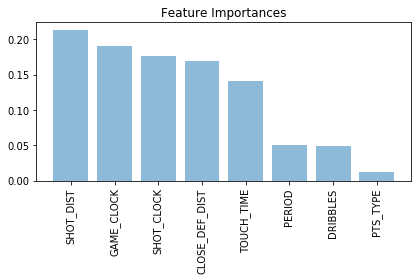

In [25]:
importances = forest.feature_importances_
# get sort indices in descending order
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            X_train.columns.values[indices[f]], 
                            importances[indices[f]]))

plt.figure()
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]),
        importances[indices],
        align='center',
        alpha=0.5)

plt.xticks(range(X_train.shape[1]), 
           X_train.columns.values[indices], rotation=90)
plt.tight_layout()
plt.show()

選到的是:'GAME_CLOCK' 'SHOT_DIST' 'SHOT_CLOCK'這三個變數

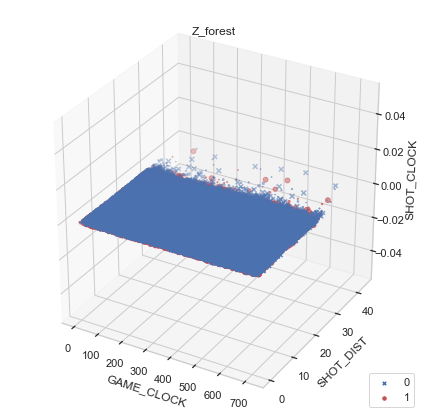

In [27]:
import os
import seaborn as sns
sns.set(style='whitegrid', context='notebook')

#import Axes3D for plottin 3d scatter
from mpl_toolkits.mplot3d import Axes3D

X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')
Z_forest = X_train[['GAME_CLOCK', 'SHOT_DIST', 'SHOT_CLOCK']].values

colors = ['b', 'r']
markers = ['x', 'o']
fig = plt.figure(figsize=(12,6))

#plot 3D
plt3 = fig.add_subplot(1,2,1, projection='3d')
for l, c, m in zip(np.unique(y_train.values), colors, markers):
    plt.scatter(Z_forest[(y_train.values==l).reshape(-1), 0], 
                Z_forest[(y_train.values==l).reshape(-1), 1],
                     Z_forest[(y_train.values==l).reshape(-1), 2],
                c=c, label=l, marker=m)

plt.title('Z_forest')
plt3.set_xlabel('GAME_CLOCK')
plt3.set_ylabel('SHOT_DIST')
plt3.set_zlabel('SHOT_CLOCK')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()



發現看不出有效的分界面

## **Random Forest based on PCA**

In [28]:
import numpy as np
from sklearn.preprocessing import StandardScaler

X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')

X_train = X_train.values
X_train = X_train[:,(1,2,4,5,7)]

# Z-normalize data
sc = StandardScaler()
Z = sc.fit_transform(X_train)
# Estimate the correlation matrix
R = np.dot(Z.T, Z) / X_train.shape[0]

#calculate the eigen values, eigen vectors
eigen_vals, eigen_vecs = np.linalg.eigh(R)

# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(reverse=True)

W_3D = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis],
                    eigen_pairs[2][1][:, np.newaxis]))

Z_pca = Z.dot(W_3D)

Z_pca_train, Z_pca_valid, y_pca_train, y_pca_valid = train_test_split(
    Z_pca, y_train, test_size=0.2, random_state=0)

# train a random forest based on Z_pca

forest_pca = RandomForestClassifier(criterion='entropy',    max_features=2, max_depth=15,
                                n_estimators=300, 
                                random_state=0,
                                n_jobs=2)
forest_pca.fit(Z_pca_train, y_pca_train)

y_pca_pred = forest_pca.predict(Z_pca_valid)
print('Accuracy (forest_pca): %.2f' % accuracy_score(y_pca_valid, y_pca_pred))

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Accuracy (forest_pca): 0.59


發現結果不是很好

## **Polynomial+Ridge**  
利用Ridge選到的三個變數來配適模型


[Degree = 1]
Train&Valid Misclassified samples: 27042 , 6815
Train&Valid Accuracy: 0.61 , 0.60

[Degree = 2]
Train&Valid Misclassified samples: 26411 , 6699
Train&Valid Accuracy: 0.61 , 0.61

[Degree = 3]
Train&Valid Misclassified samples: 26203 , 6730
Train&Valid Accuracy: 0.62 , 0.61

[Degree = 4]
Train&Valid Misclassified samples: 26211 , 6724
Train&Valid Accuracy: 0.62 , 0.61

[Degree = 5]
Train&Valid Misclassified samples: 26227 , 6711
Train&Valid Accuracy: 0.62 , 0.61


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.90538e-17): result may not be accurate.
  overwrite_a=True).T



[Degree = 6]
Train&Valid Misclassified samples: 26185 , 6688
Train&Valid Accuracy: 0.62 , 0.61


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.39669e-20): result may not be accurate.
  overwrite_a=True).T



[Degree = 7]
Train&Valid Misclassified samples: 26136 , 6702
Train&Valid Accuracy: 0.62 , 0.61


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.97707e-23): result may not be accurate.
  overwrite_a=True).T



[Degree = 8]
Train&Valid Misclassified samples: 26102 , 6672
Train&Valid Accuracy: 0.62 , 0.61

[Degree = 9]
Train&Valid Misclassified samples: 26078 , 6681
Train&Valid Accuracy: 0.62 , 0.61

[Degree = 10]
Train&Valid Misclassified samples: 26043 , 6697
Train&Valid Accuracy: 0.62 , 0.61


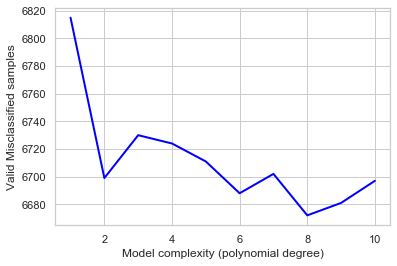

In [29]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot

n = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
results_train = list()
results_valid = list()
for d in range(1, 11):
    
    X_train = pd.read_csv('X_train.csv')
    y_train = pd.read_csv('y_train.csv')

    sc = StandardScaler()
    X_std = sc.fit_transform(X_train)
    X_std = X_std[:,(4,5,7)]

    poly = PolynomialFeatures(degree=d)
    X_poly = poly.fit_transform(X_std)

    X_train, X_valid, y_train, y_valid = train_test_split(
        X_poly, y_train, test_size=0.2, random_state=0)
    
    
    rg = Ridge(alpha=100)
    rg.fit(X_train, y_train)
    
    y_train_pred = rg.predict(X_train)
    y_valid_pred = rg.predict(X_valid)

    y_train_pred = np.where(y_train_pred>0.5,1,0).reshape(-1,1) 
    y_valid_pred = np.where(y_valid_pred>0.5,1,0).reshape(-1,1) 
    
    print('\n[Degree = %d]' % d) 

    print('Train&Valid Misclassified samples: %d , %d' % ((y_train != y_train_pred).sum(), 
                                  (y_valid != y_valid_pred).sum()))
    print('Train&Valid Accuracy: %.2f , %.2f' % (accuracy_score(y_train, y_train_pred),
                              accuracy_score(y_valid, y_valid_pred))) 
    
    mis_valid = (y_valid != y_valid_pred).sum()
    results_valid.append(mis_valid)
    
pyplot.plot(n, results_valid, label = 'Valid', color = 'blue', linewidth = 2)
pyplot.xlabel('Model complexity (polynomial degree)')
pyplot.ylabel('Valid Misclassified samples')
pyplot.show()

Degree = 8 的時候表現最好

### **挑選 Threshold**

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.97707e-23): result may not be accurate.
  overwrite_a=True).T


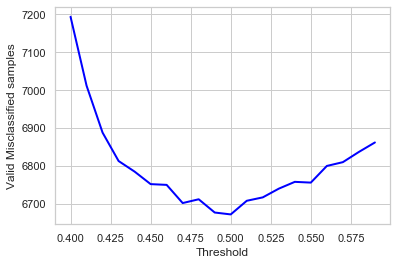

array([0.5])

In [30]:
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')

sc = StandardScaler()
X_std = sc.fit_transform(X_train)
X_std = X_std[:,(4,5,7)]

poly = PolynomialFeatures(degree=8)
X_poly = poly.fit_transform(X_std)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_poly, y_train, test_size=0.2, random_state=0)
a = np.arange(0.4, 0.6, 0.01)
results_valid=[]
rg = Ridge(alpha=100)
rg.fit(X_train, y_train)

for n in a:

    y_train_pred = rg.predict(X_train)
    y_valid_pred = rg.predict(X_valid)


    y_train_pred = np.where(y_train_pred>n,1,0)
    y_valid_pred = np.where(y_valid_pred>n,1,0)
    # print('\n[Alpha = %.2f]' % n )
    # print('Train&Valid Misclassified samples: %d , %d' % ((y_train != y_train_pred).sum(), 
    #                               (y_valid != y_valid_pred).sum()))
    # print('Train&Valid Accuracy: %.2f , %.2f' % (accuracy_score(y_train, y_train_pred),
    #                           accuracy_score(y_valid, y_valid_pred)))
    acc_valid = (y_valid != y_valid_pred).sum()
    results_valid.append(acc_valid)
    
pyplot.plot(a, results_valid, label = 'Valid', color = 'blue', linewidth = 2)
pyplot.xlabel('Threshold')
pyplot.ylabel('Valid Misclassified samples')
pyplot.show()
c = pd.DataFrame(results_valid)
a[c.idxmin()]

Threshold = 0.5 時表現最好

## **Random Forest Regression**

In [8]:
from sklearn.ensemble import RandomForestRegressor

X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')

X_train, X_valid, y_train, y_valid = train_test_split(
         X_train, y_train, test_size=0.2, random_state=0)


forest = RandomForestRegressor(
    n_estimators=300, criterion='mse', random_state=0, n_jobs=-1, max_depth=15, max_features=2)
forest.fit(X_train, y_train) 

y_train_pred = forest.predict(X_train)
y_valid_pred = forest.predict(X_valid)

y_train_pred = np.where(y_train_pred>0.5,1,0).reshape(-1,1) 
y_valid_pred = np.where(y_valid_pred>0.5,1,0).reshape(-1,1)


print('Train&Valid Misclassified samples: %d , %d' % ((y_train != y_train_pred).sum(), 
                                  (y_valid != y_valid_pred).sum()))
print('Train&Valid Accuracy: %.2f , %.2f' % (accuracy_score(y_train, y_train_pred),
                              accuracy_score(y_valid, y_valid_pred)))



C:\Users\user\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


Train&Valid Misclassified samples: 17126 , 6658
Train&Valid Accuracy: 0.75 , 0.61


### **挑選 Threshold**

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\user\AppData\Ro

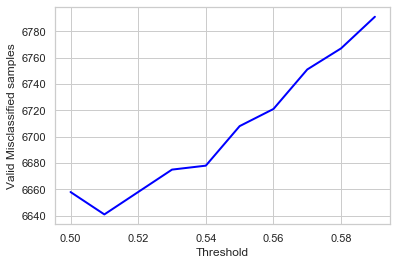

array([0.51])

In [32]:
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')

X_train, X_valid, y_train, y_valid = train_test_split(
         X_train, y_train, test_size=0.2, random_state=0)

a = np.arange(0.5, 0.6, 0.01)
results_valid=[]

for n in a:

    forest = RandomForestRegressor(
        n_estimators=300, criterion='mse', random_state=0, n_jobs=-1, max_depth=15, max_features=2)
    forest.fit(X_train, y_train) 

    y_train_pred = forest.predict(X_train)
    y_valid_pred = forest.predict(X_valid)

    y_train_pred = np.where(y_train_pred>n,1,0).reshape(-1,1) 
    y_valid_pred = np.where(y_valid_pred>n,1,0).reshape(-1,1)

    acc_valid = (y_valid != y_valid_pred).sum()
    results_valid.append(acc_valid)
    
pyplot.plot(a, results_valid, label = 'Valid', color = 'blue', linewidth = 2)
pyplot.xlabel('Threshold')
pyplot.ylabel('Valid Misclassified samples')
pyplot.show()
c = pd.DataFrame(results_valid)
a[c.idxmin()]


Threshold = 0.51 時表現最好

## **Boosting**

In [ ]:
import numpy as np
import pandas as pd
from sklearn import ensemble, preprocessing, metrics

X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')

#X_train = X_train.values
#X_train = X_train[:,(4,5,7)]

X_train, X_valid, y_train, y_valid = train_test_split(
        X_train, y_train, test_size=0.2, random_state=0)

bag = ensemble.BaggingClassifier(RandomForestClassifier(max_depth=15, max_features=2, n_estimators=300), n_estimators = 100 )
bag_fit = bag.fit(X_train, y_train)

y_valid_pred = bag.predict(X_valid).reshape(-1,1)

accuracy = metrics.accuracy_score(y_valid, y_valid_pred)
print('Misclassified samples: %d' % (y_valid != y_valid_pred).sum())
print(accuracy)

## **AdaBoost**

In [ ]:
import numpy as np
import pandas as pd
from sklearn import ensemble, preprocessing, metrics

X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')

#X_train = X_train.values
#X_train = X_train[:,(4,5,7)]

X_train, X_valid, y_train, y_valid = train_test_split(
        X_train, y_train, test_size=0.2, random_state=0)


boost = ensemble.AdaBoostClassifier(RandomForestClassifier(max_depth=15, max_features=2,n_estimators=300), n_estimators = 100)
boost_fit = boost.fit(X_train, y_train)

y_valid_pred = boost.predict(X_valid)

accuracy = metrics.accuracy_score(y_valid, y_valid_pred)
print(accuracy)

## **Logistic**

In [41]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, linear_model

X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')

#X_train = X_train.values
#X_train = X_train[:,(4,5,7)]

X_train, X_valid, y_train, y_valid = train_test_split(
        X_train, y_train, test_size=0.2, random_state=0)


logistic_regr = linear_model.LogisticRegression()
logistic_regr.fit(X_train, y_train)

y_valid_pred = logistic_regr.predict(X_valid)
accuracy = logistic_regr.score(X_valid, y_valid)
print(accuracy)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6085942510640779


## **綜合以上各自挑到表現最好的方法比較**

### Ridge

In [49]:
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')

sc = StandardScaler()
X_std = sc.fit_transform(X_train)

poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X_std)

X_train, X_valid, y_train, y_valid = train_test_split(
        X_poly, y_train, test_size=0.2, random_state=0)

lr_rg = Ridge(alpha=100)
lr_rg.fit(X_train, y_train)

y_train_pred = lr_rg.predict(X_train)
y_valid_pred = lr_rg.predict(X_valid)

y_train_pred = np.where(y_train_pred>0.51,1,0)
y_valid_pred = np.where(y_valid_pred>0.51,1,0)

# Print confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_valid, y_valid_pred)

print('Train&Valid Misclassified samples: %d , %d' % ((y_train != y_train_pred).sum(), 
                                  (y_valid != y_valid_pred).sum()))
print('Train&Valid Accuracy: %.2f , %.2f' % (accuracy_score(y_train, y_train_pred),
                              accuracy_score(y_valid, y_valid_pred)))    

Train&Valid Misclassified samples: 26133 , 6664
Train&Valid Accuracy: 0.62 , 0.61


### LASSO

In [50]:
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')

sc = StandardScaler()
X_std = sc.fit_transform(X_train)

poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X_std)

X_train, X_valid, y_train, y_valid = train_test_split(
        X_poly, y_train, test_size=0.2, random_state=0)

lr_rg = Lasso(alpha=0)
lr_rg.fit(X_train, y_train)

y_train_pred = lr_rg.predict(X_train)
y_valid_pred = lr_rg.predict(X_valid)

y_train_pred = np.where(y_train_pred>0.47,1,0).reshape(-1,1) 
y_valid_pred = np.where(y_valid_pred>0.47,1,0).reshape(-1,1) 

# Print confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_valid, y_valid_pred)
print('Train&Valid Misclassified samples: %d , %d' % ((y_train != y_train_pred).sum(), 
                                  (y_valid != y_valid_pred).sum()))
print('Train&Valid Accuracy: %.2f , %.2f' % (accuracy_score(y_train, y_train_pred),
                              accuracy_score(y_valid, y_valid_pred)))     

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:14: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)


Train&Valid Misclassified samples: 26346 , 6661
Train&Valid Accuracy: 0.62 , 0.61


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7896.1108131296005, tolerance: 1.6993458760932953
  positive)


### Random Forest

In [51]:
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')


X_train, X_valid, y_train, y_valid = train_test_split(
        X_train, y_train, test_size=0.2, random_state=0)
    

forest = RandomForestClassifier(criterion='entropy',n_estimators=300, random_state=0, n_jobs=2, max_features=2, max_depth=15)
forest.fit(X_train, y_train)

y_valid_pred = forest.predict(X_valid).reshape(-1,1)
confusion_matrix(y_valid, y_valid_pred)
print('Train&Valid Misclassified samples: %d , %d' % ((y_train != y_train_pred).sum(), 
                                  (y_valid != y_valid_pred).sum()))
print('Train&Valid Accuracy: %.2f , %.2f' % (accuracy_score(y_train, y_train_pred),
                              accuracy_score(y_valid, y_valid_pred)))    

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


Train&Valid Misclassified samples: 26346 , 6629
Train&Valid Accuracy: 0.62 , 0.61


### Polynomial&Ridge


In [52]:
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')

sc = StandardScaler()
X_std = sc.fit_transform(X_train)
X_std = X_std[:,(4,5,7)]

poly = PolynomialFeatures(degree=8)
X_poly = poly.fit_transform(X_std)

X_train, X_valid, y_train, y_valid = train_test_split(
     X_poly, y_train, test_size=0.2, random_state=0)
    
    
rg = Ridge(alpha=100)
rg.fit(X_train, y_train)
    
y_train_pred = rg.predict(X_train)
y_valid_pred = rg.predict(X_valid)

y_train_pred = np.where(y_train_pred>0.5,1,0).reshape(-1,1) 
y_valid_pred = np.where(y_valid_pred>0.5,1,0).reshape(-1,1)

confusion_matrix(y_valid, y_valid_pred)
print('Train&Valid Misclassified samples: %d , %d' % ((y_train != y_train_pred).sum(), 
                                  (y_valid != y_valid_pred).sum()))
print('Train&Valid Accuracy: %.2f , %.2f' % (accuracy_score(y_train, y_train_pred),
                              accuracy_score(y_valid, y_valid_pred)))    

Train&Valid Misclassified samples: 26102 , 6672
Train&Valid Accuracy: 0.62 , 0.61


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.97707e-23): result may not be accurate.
  overwrite_a=True).T


### Random Forest Regression

In [39]:
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')

X_train, X_valid, y_train, y_valid = train_test_split(
         X_train, y_train, test_size=0.2, random_state=0)


forest = RandomForestRegressor(
    n_estimators=300, criterion='mse', random_state=0, n_jobs=-1, max_features=2, max_depth=15)
forest.fit(X_train, y_train) 

y_train_pred = forest.predict(X_train)
y_valid_pred = forest.predict(X_valid)

y_train_pred = np.where(y_train_pred>0.51,1,0).reshape(-1,1)
y_valid_pred = np.where(y_valid_pred>0.51,1,0).reshape(-1,1)

#confusion_matrix(y_valid, y_valid_pred)

print('Train&Valid Misclassified samples: %d , %d' % ((y_train != y_train_pred).sum(), 
                                  (y_valid != y_valid_pred).sum()))
print('Train&Valid Accuracy: %.2f , %.2f' % (accuracy_score(y_train, y_train_pred),
                              accuracy_score(y_valid, y_valid_pred)))    

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


Train&Valid Misclassified samples: 17621 , 6641
Train&Valid Accuracy: 0.74 , 0.61


In [41]:
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')

X_test = pd.read_csv('X_test.csv')

X_train, X_valid, y_train, y_valid = train_test_split(
         X_train, y_train, test_size=0.2, random_state=0)


forest = RandomForestRegressor(
    n_estimators=300, criterion='mse', random_state=0, n_jobs=-1, max_features=2, max_depth=15)
forest.fit(X_train, y_train) 


y_test_pred = forest.predict(X_test)
y_test_pred = np.where(y_test_pred>0.51,1,0)

sub = pd.DataFrame({'FGM': y_test_pred})

sub.to_csv('y_pred.csv', index=False)


C:\Users\user\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


## **1. How you evaluate your model.**

從上面的方法比較來看，可以發現表現都差不，而Random Forest Regression以很微小的差距比其他模型結果稍微好一點

## **2. All models you have tried and the corresponding results.**  
請參閱上面


## **3. Plot the error curve of your best model and tell if it is over-fit or not.**

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


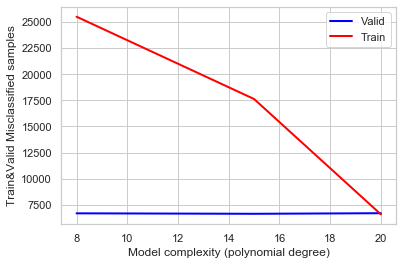

[FGM    6686
 dtype: int64,
 FGM    6641
 dtype: int64,
 FGM    6697
 dtype: int64]

In [72]:
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')


X_train, X_valid, y_train, y_valid = train_test_split(
            X_train, y_train, test_size=0.2, random_state=0)


results_train=list()
results_valid=list()

n_deep = [8, 15, 20]
for n in n_deep:    

    forest = RandomForestRegressor(
        n_estimators=300, criterion='mse', random_state=0, n_jobs=-1, max_features=2, max_depth=n)
    forest.fit(X_train, y_train) 

    y_train_pred = forest.predict(X_train)
    y_valid_pred = forest.predict(X_valid)

    y_train_pred = np.where(y_train_pred>0.51,1,0).reshape(-1,1) 
    y_valid_pred = np.where(y_valid_pred>0.51,1,0).reshape(-1,1)
    
    mis_train = (y_train != y_train_pred).sum()
    results_train.append(mis_train)
    mis_valid = (y_valid != y_valid_pred).sum()
    results_valid.append(mis_valid)
    
pyplot.plot(n_deep, results_valid, label = 'Valid', color = 'blue', linewidth = 2)
pyplot.plot(n_deep, results_train, label = 'Train', color = 'red', linewidth = 2)
pyplot.xlabel('Model complexity (polynomial degree)')
pyplot.ylabel('Train&Valid Misclassified samples')
plt.legend(loc='upper right')
pyplot.show()
results_valid

可以看到隨著樹的深度越來越深，training data的Misclassified samples越來越少，但是valid的則是由小變大，由此可知樹的深度達到20時已經overfitting了。(圖中藍色線起伏不明顯，上面有附在不同深度時，valid set的Misclassified samples的個數，可以比較明顯的看到由小變大，所以深度為15時是沒有overfitting的)

## **4. The top-3 features you find and how you find it .**  
Ridge找到的前三features:'TOUCH_TIME' 'SHOT_DIST' 'CLOSE_DEF_DIST'  
(透過增加Alpha，去除掉最快收斂到0的變數，選擇絕對值前三大的三個變數)  
透過Random Forest找到的前三features:'GAME_CLOCK' 'SHOT_DIST' 'SHOT_CLOCK'  
(透過Feature Importance，選擇最大的前三個)


## **5. A brief report what you do in this assignment.**  
發現模型的表現都大同小異，差距不大，只能透過一些參數的調整來達到較好的效果